# This notebook stands for exploratory data analysis (EDA) from which some insights from the data can be found.

In [1]:
!git clone https://github.com/OopsWrongCode/nlp-project.git

Cloning into 'nlp-project'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 137 (delta 20), reused 43 (delta 12), pack-reused 84 (from 1)
Receiving objects: 100% (137/137), 46.73 MiB | 21.70 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
%cd nlp-project/

/kaggle/working/nlp-project


In [3]:
%pip install regex


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')

import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]  

True

In [5]:
from data.data_loader import loader
from src.utils import *

PATH = loader()
os.listdir(PATH)

Dataset downloaded at path: /kaggle/input/emotions-dataset-for-nlp


['val.txt', 'test.txt', 'train.txt']

In [6]:
val_file_path = os.path.join(PATH,os.listdir(PATH)[0])
test_file_path = os.path.join(PATH,os.listdir(PATH)[1])
train_file_path = os.path.join(PATH,os.listdir(PATH)[2])

In [7]:
train = pd.read_csv(train_file_path, sep=';', header=None)
valid = pd.read_csv(val_file_path, sep=';', header=None)
test = pd.read_csv(test_file_path, sep=';', header=None)

In [8]:
train.rename({0 : 'text', 1 : 'label'}, inplace=True, axis=1)
test.rename({0 : 'text', 1 : 'label'}, inplace=True, axis=1)
valid.rename({0 : 'text', 1 : 'label'}, inplace=True, axis=1)

In [27]:
train.head()

,text,label,token_count,text_length
0,"[didnt, feel, humiliated]",sadness,4,23
1,"[can, go, from, feeling, so, hopeless, to, so,...",sadness,21,108
2,"[im, grabbing, minute, to, post, feel, greedy,...",anger,10,48
3,"[am, ever, feeling, nostalgic, about, the, fir...",love,18,92
4,"[am, feeling, grouchy]",anger,4,20


In [28]:
test.head()

,text,label
0,"[im, feeling, rather, rotten, so, im, not, ver...",sadness
1,"[im, updating, my, blog, because, feel, shitty]",sadness
2,"[never, make, her, separate, from, me, because...",sadness
3,"[left, with, my, bouquet, of, red, and, yellow...",joy
4,"[was, feeling, little, vain, when, did, this, ...",sadness


In [11]:
print(f"Shape of train : {train.shape}\nShape of validation : {valid.shape}\nShape of test : {test.shape}")

Shape of train : (16000, 2)
Shape of validation : (2000, 2)
Shape of test : (2000, 2)


In [12]:
train['label'].value_counts(normalize=True).round(4)

label
joy         0.3351
sadness     0.2916
anger       0.1349
fear        0.1211
love        0.0815
surprise    0.0357
Name: proportion, dtype: float64

In [13]:
train['token_count'] = [len(sentence.split()) for sentence in train['text']]
train['text_length'] = [len(seq) for seq in train['text']]

In [14]:
# df.iloc[55]['text']

In [15]:
print(f"Number of duplicates: {(len(train) - len(train.drop_duplicates(subset=['text'])))} ({round((len(train) - len(train.drop_duplicates(subset=['text']))) / len(train) * 100,2)}%)")
train = train.drop_duplicates(subset=['text'])

Number of duplicates: 31 (0.19%)


In [16]:
print(f"Number of duplicates: {(len(valid) - len(valid.drop_duplicates(subset=['text'])))} ({round((len(valid) - len(valid.drop_duplicates(subset=['text']))) / len(valid) * 100,2)}%)")
valid = valid.drop_duplicates(subset=['text'])

Number of duplicates: 2 (0.1%)


In [17]:
# import src.utils
# print(src.utils.re.__name__)

In [18]:
train['text'] = train['text'].apply(clean_for_bert)
train['text'] = train['text'].apply(extract_clean_words)


test['text'] = test['text'].apply(clean_for_bert)
test['text'] = test['text'].apply(extract_clean_words)

valid['text'] = valid['text'].apply(clean_for_bert)
valid['text'] = valid['text'].apply(extract_clean_words)

Text(0.5, 0, 'Number of Texts')

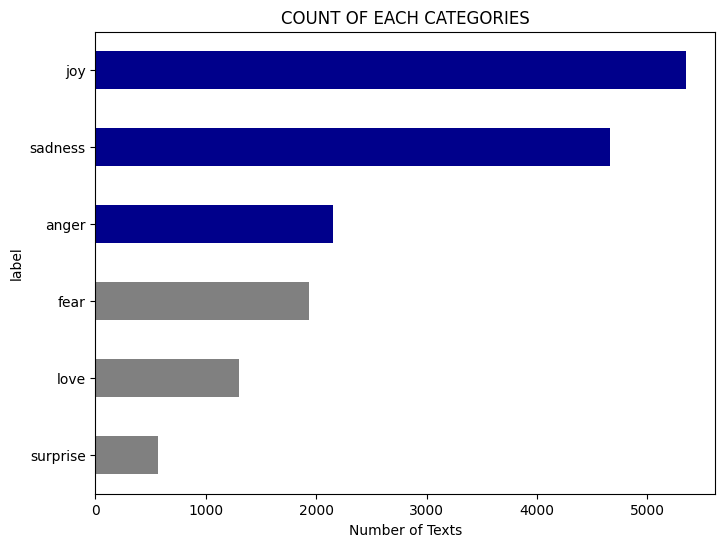

In [19]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','darkblue','darkblue','darkblue']
train.groupby('label').text.count().sort_values().plot.barh(ylim=0, color=colors, title= 'COUNT OF EACH CATEGORIES')
plt.xlabel('Number of Texts', fontsize = 10)

In [20]:
# #Visualize the data
# fig, ax = plt.subplots(figsize=(12,8))

# train['label'].value_counts(sort=True).plot(kind='bar', color='mediumseagreen', fontsize = 16)
# x = set(train['label'])

# default_x_ticks = range(len(x))

# plt.xticks(default_x_ticks, x, rotation=0, fontsize = 16)
# plt.title('Target distribution', fontsize = 20)
# plt.xlabel('Labels', fontsize = 20)
# plt.ylabel('Number of MBTIs', fontsize = 20)

# plt.show()

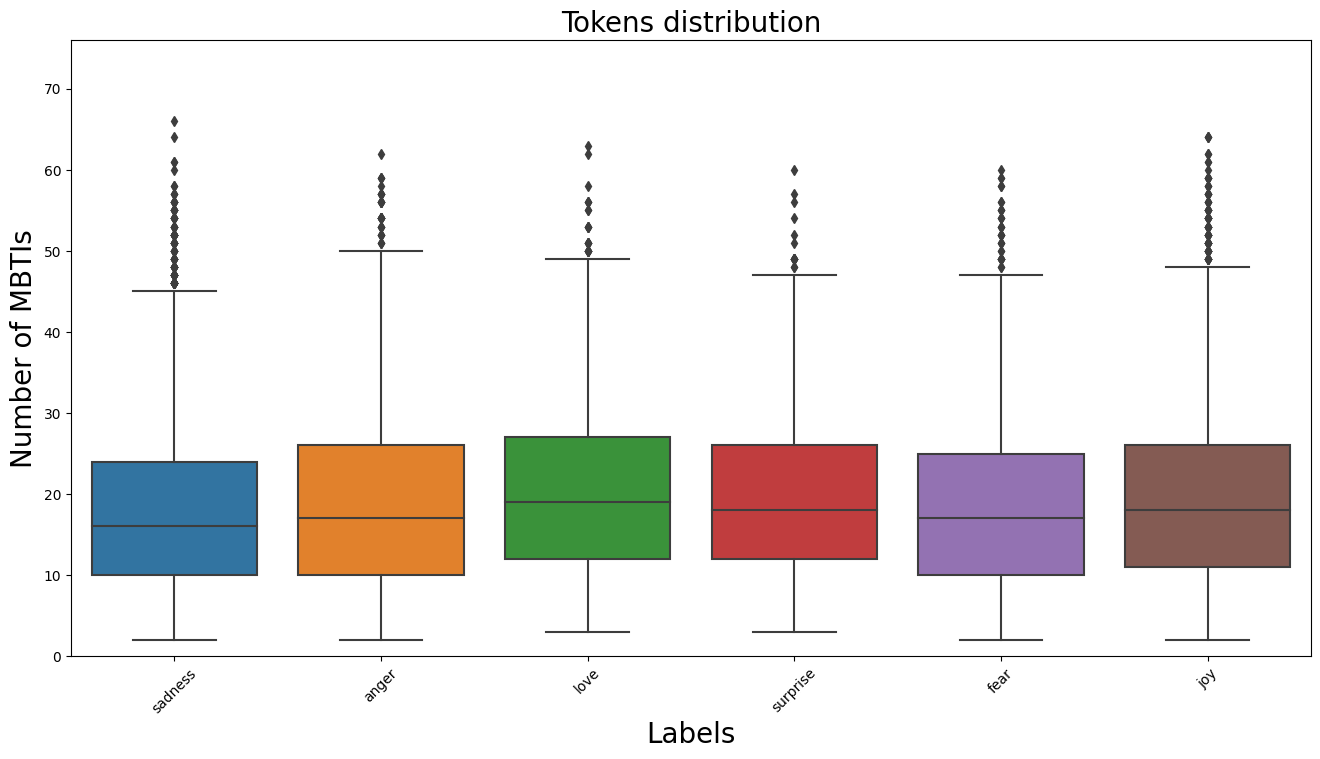

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(x='label', y='token_count', data=train)
plt.title('Tokens distribution', fontsize = 20)
plt.xlabel('Labels', fontsize = 20)
plt.ylabel('Number of MBTIs', fontsize = 20)
plt.ylim((0,train['token_count'].max() + 10))
plt.xticks(rotation=45)
plt.show()

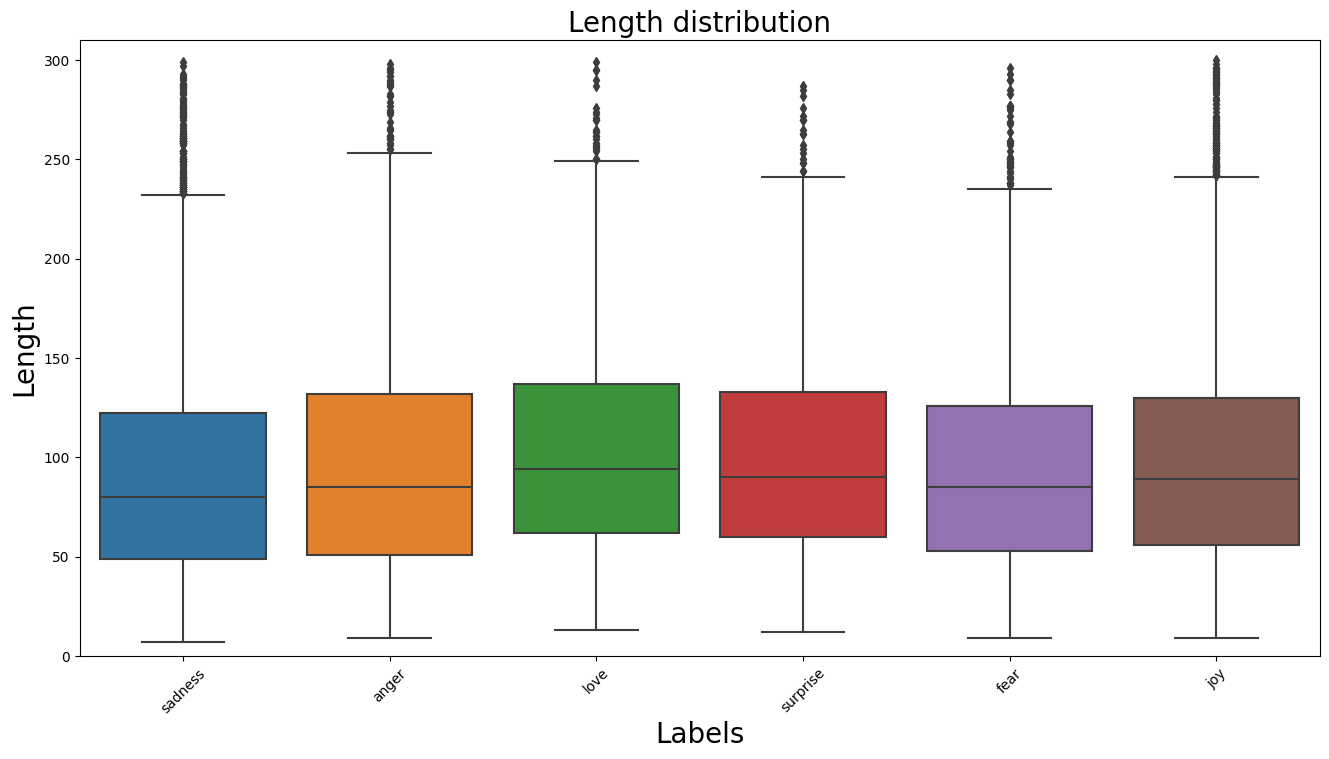

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(x='label', y='text_length', data=train)
plt.title('Length distribution', fontsize = 20)
plt.xlabel('Labels', fontsize = 20)
plt.ylabel('Length', fontsize = 20)
plt.ylim((0,train['text_length'].max() + 10))
plt.xticks(rotation=45)
plt.show()

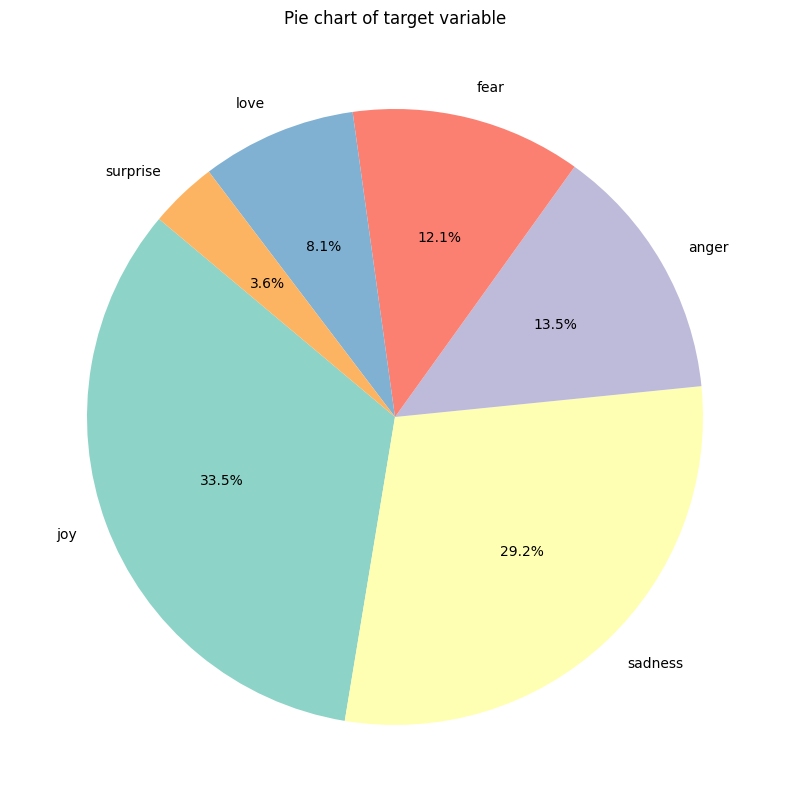

In [23]:
# Embarked town distribution pie chart
embark_counts = train['label'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(embark_counts, labels=embark_counts.index, colors=sns.color_palette('Set3'), autopct='%1.1f%%', startangle=140)
plt.title('Pie chart of target variable')
plt.show()

In [24]:
sw1 = ["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]
from nltk.corpus import stopwords
sw1 = set(sw1)
sw = stopwords.words("english")
sw = set(sw)
STOPWORDS = set.union(sw1, sw)

# source https://github.com/6/stopwords-json/blob/master/dist/en.json

# another stop words can be obtained here: spacy.load('en_core_web_sm') nlp.Defaults.stop_words

In [25]:
train.head()

,text,label,token_count,text_length
0,"[didnt, feel, humiliated]",sadness,4,23
1,"[can, go, from, feeling, so, hopeless, to, so,...",sadness,21,108
2,"[im, grabbing, minute, to, post, feel, greedy,...",anger,10,48
3,"[am, ever, feeling, nostalgic, about, the, fir...",love,18,92
4,"[am, feeling, grouchy]",anger,4,20


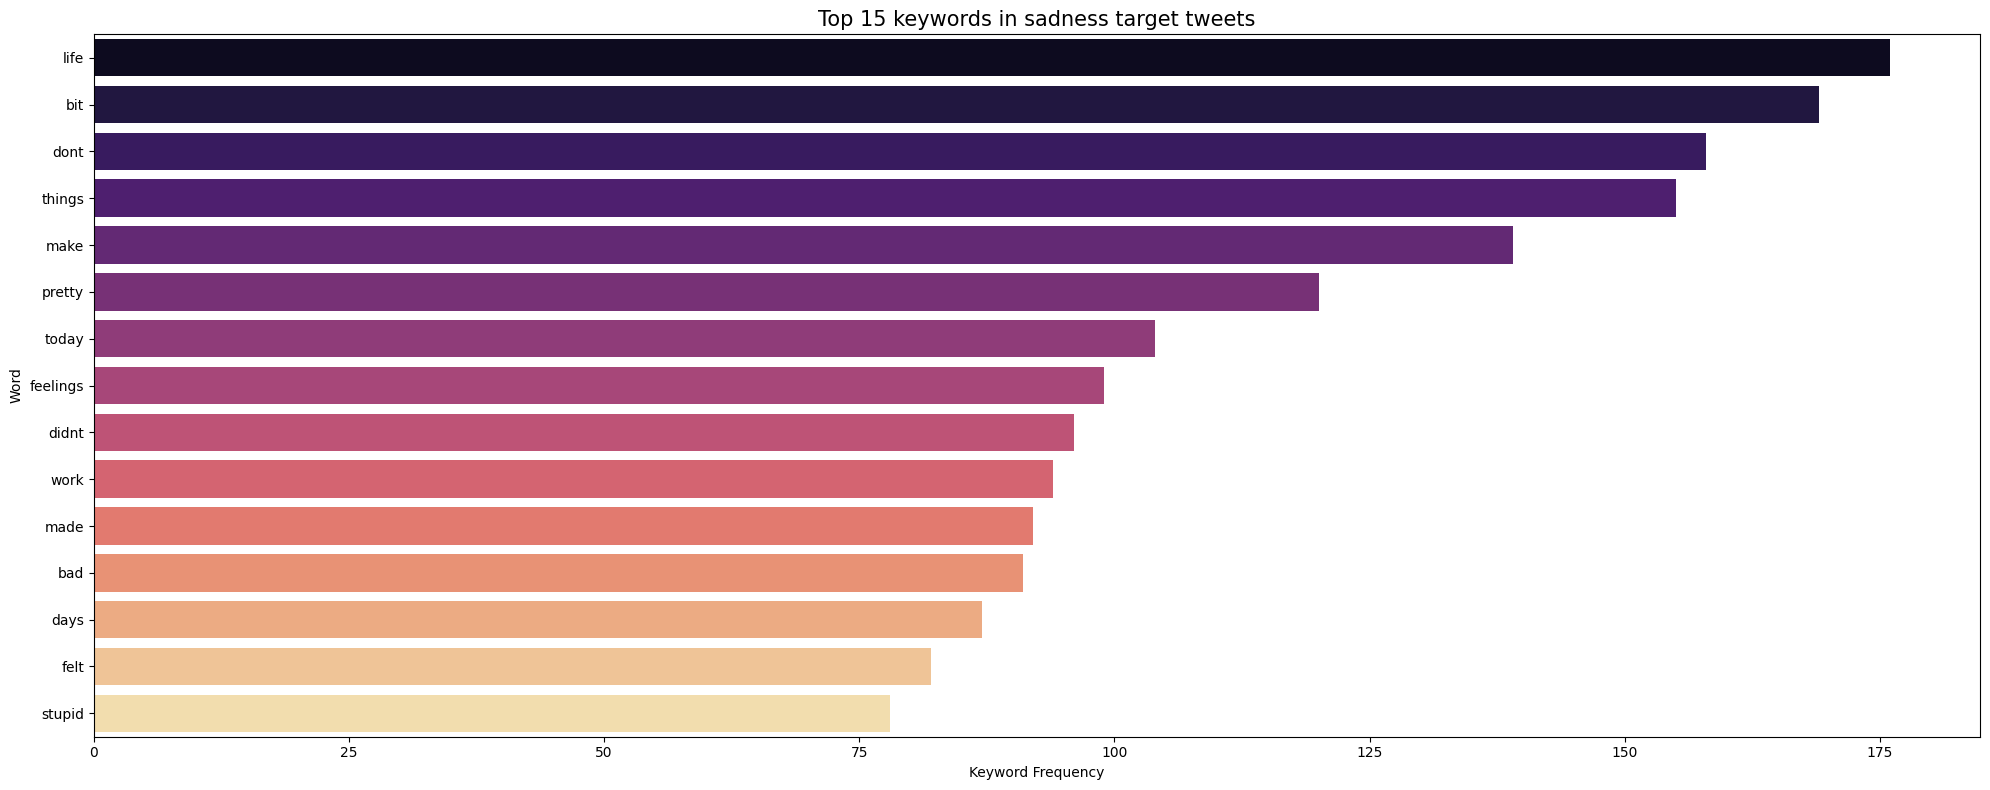

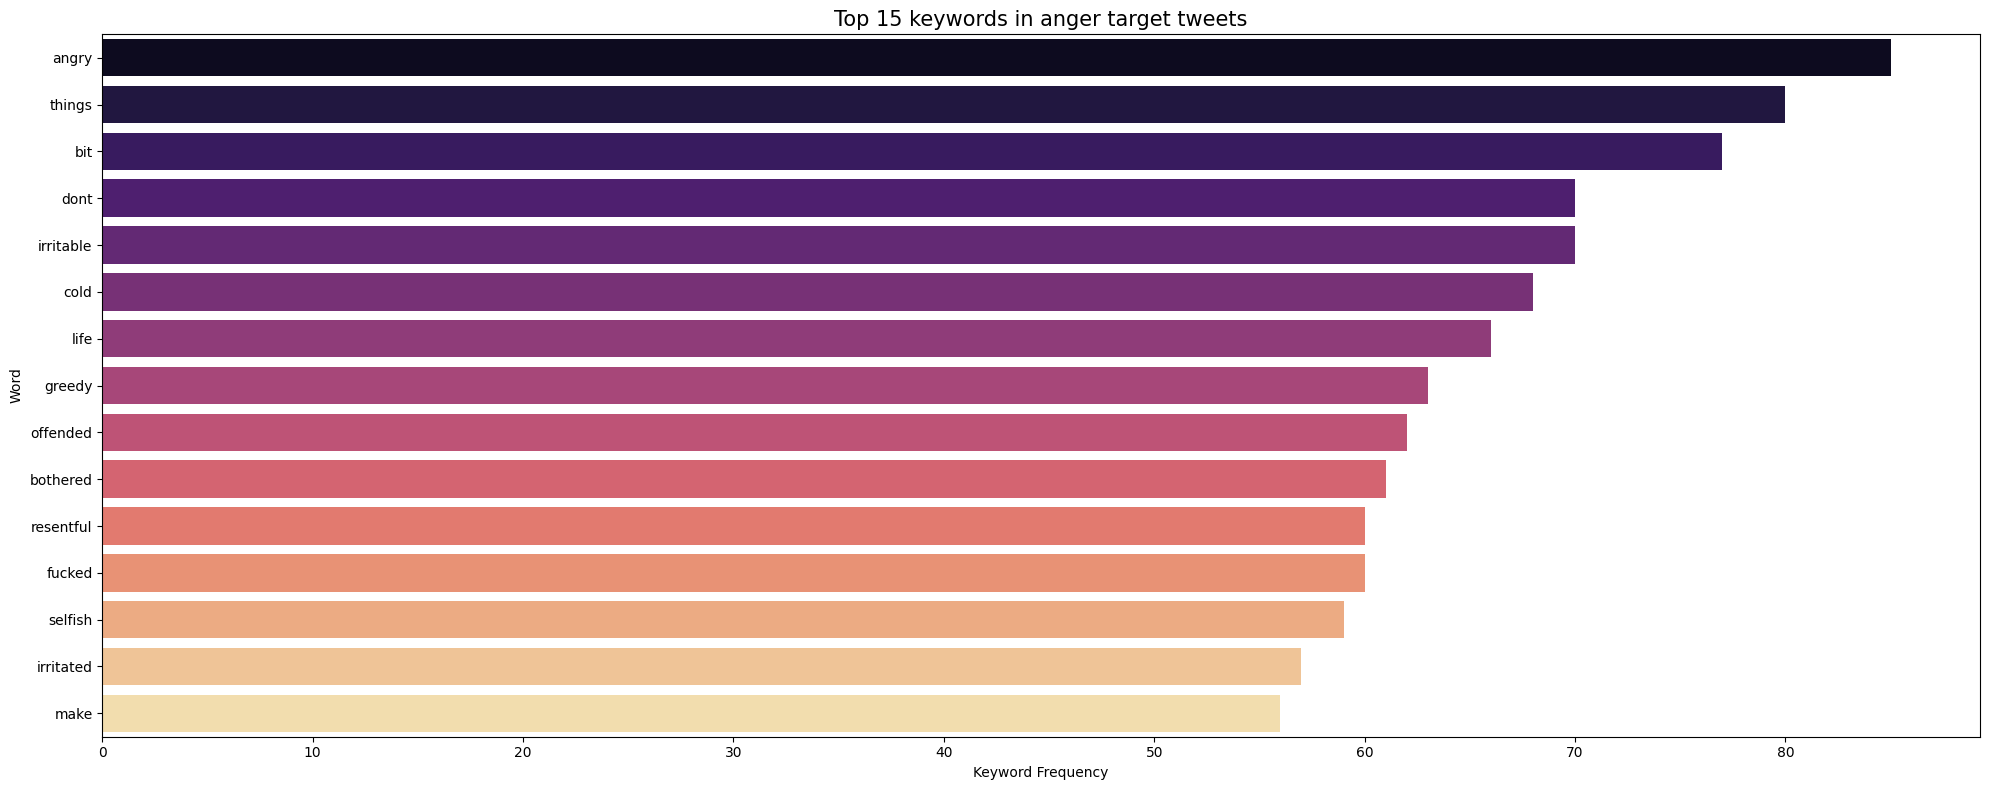

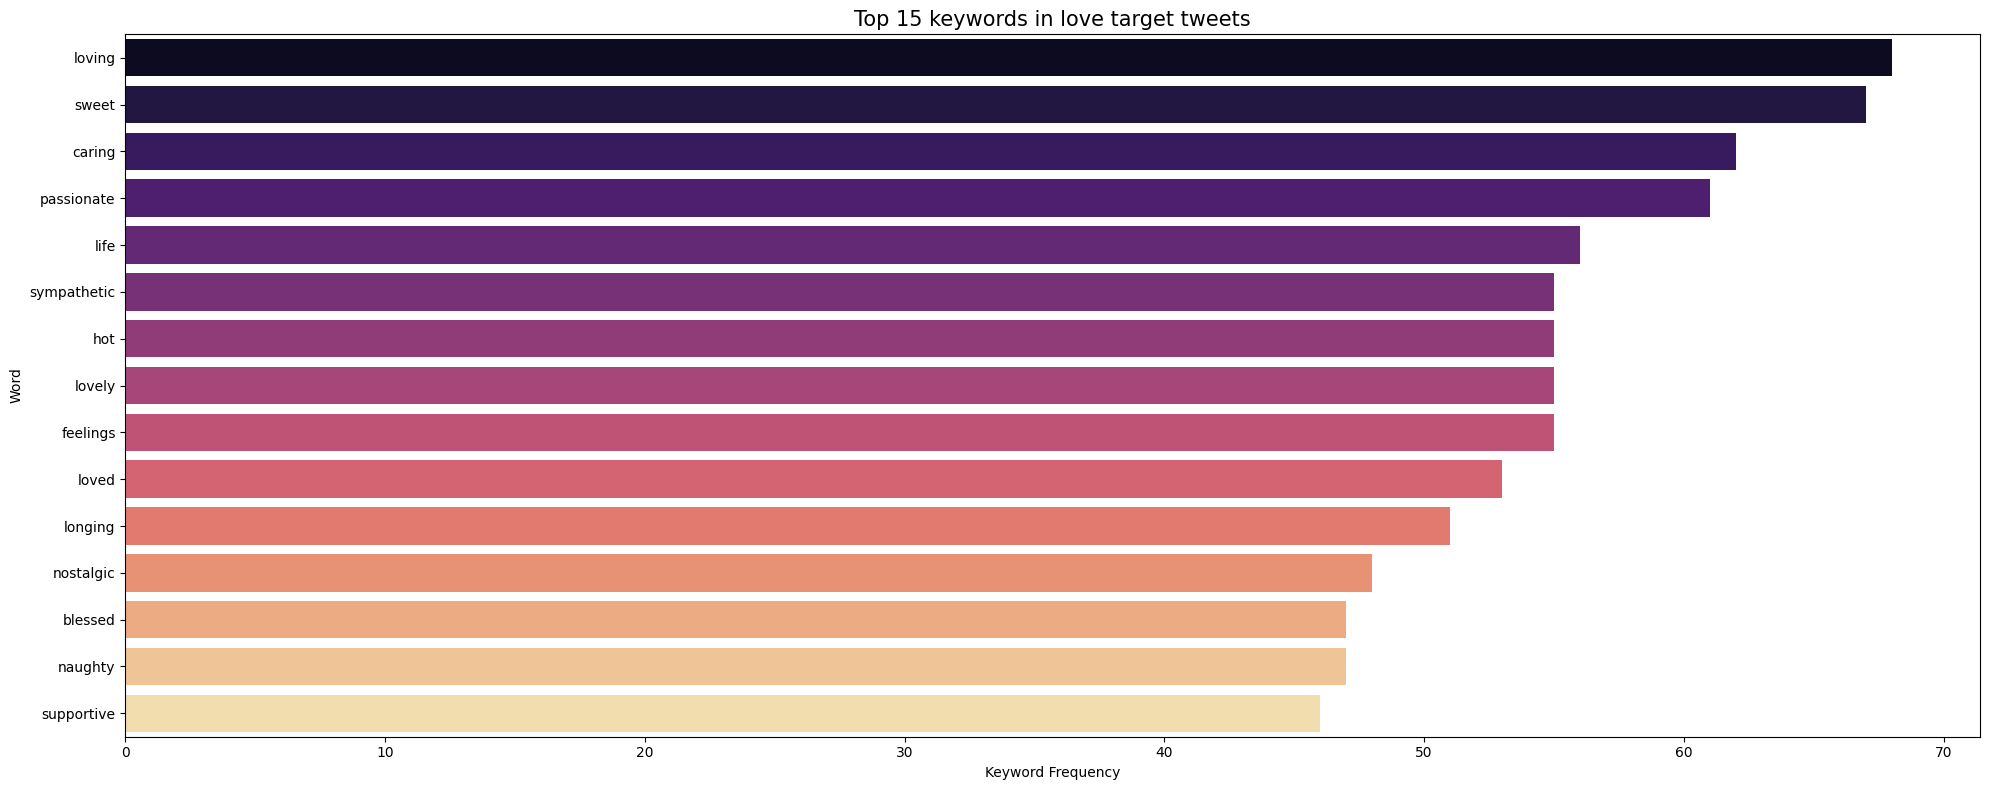

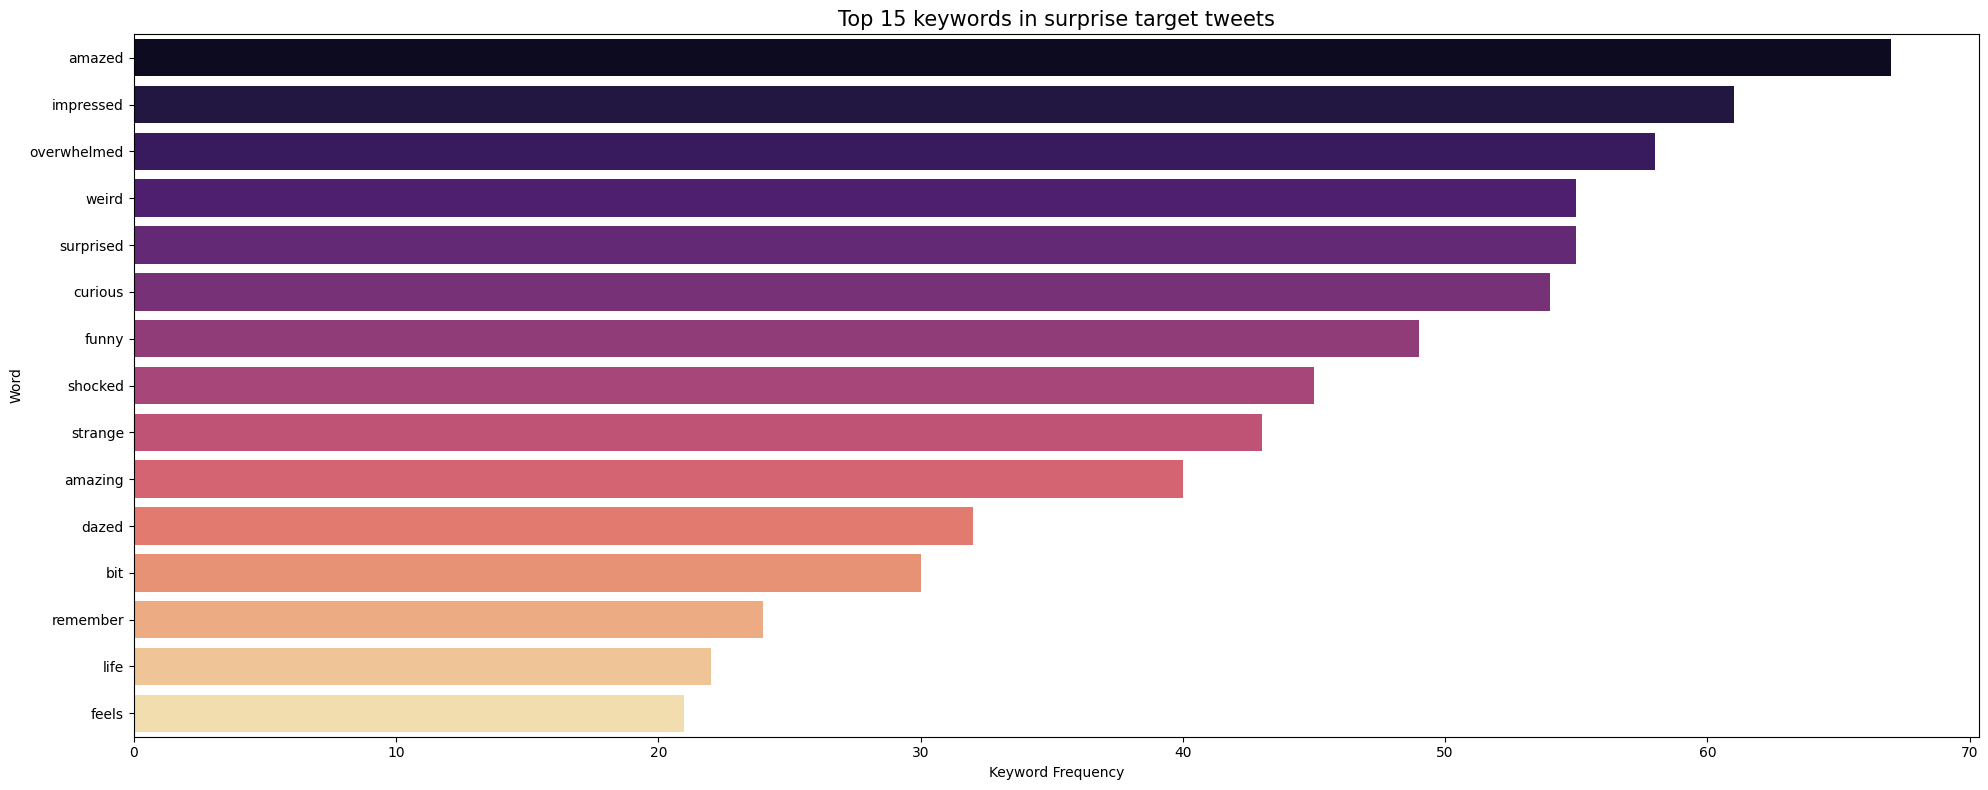

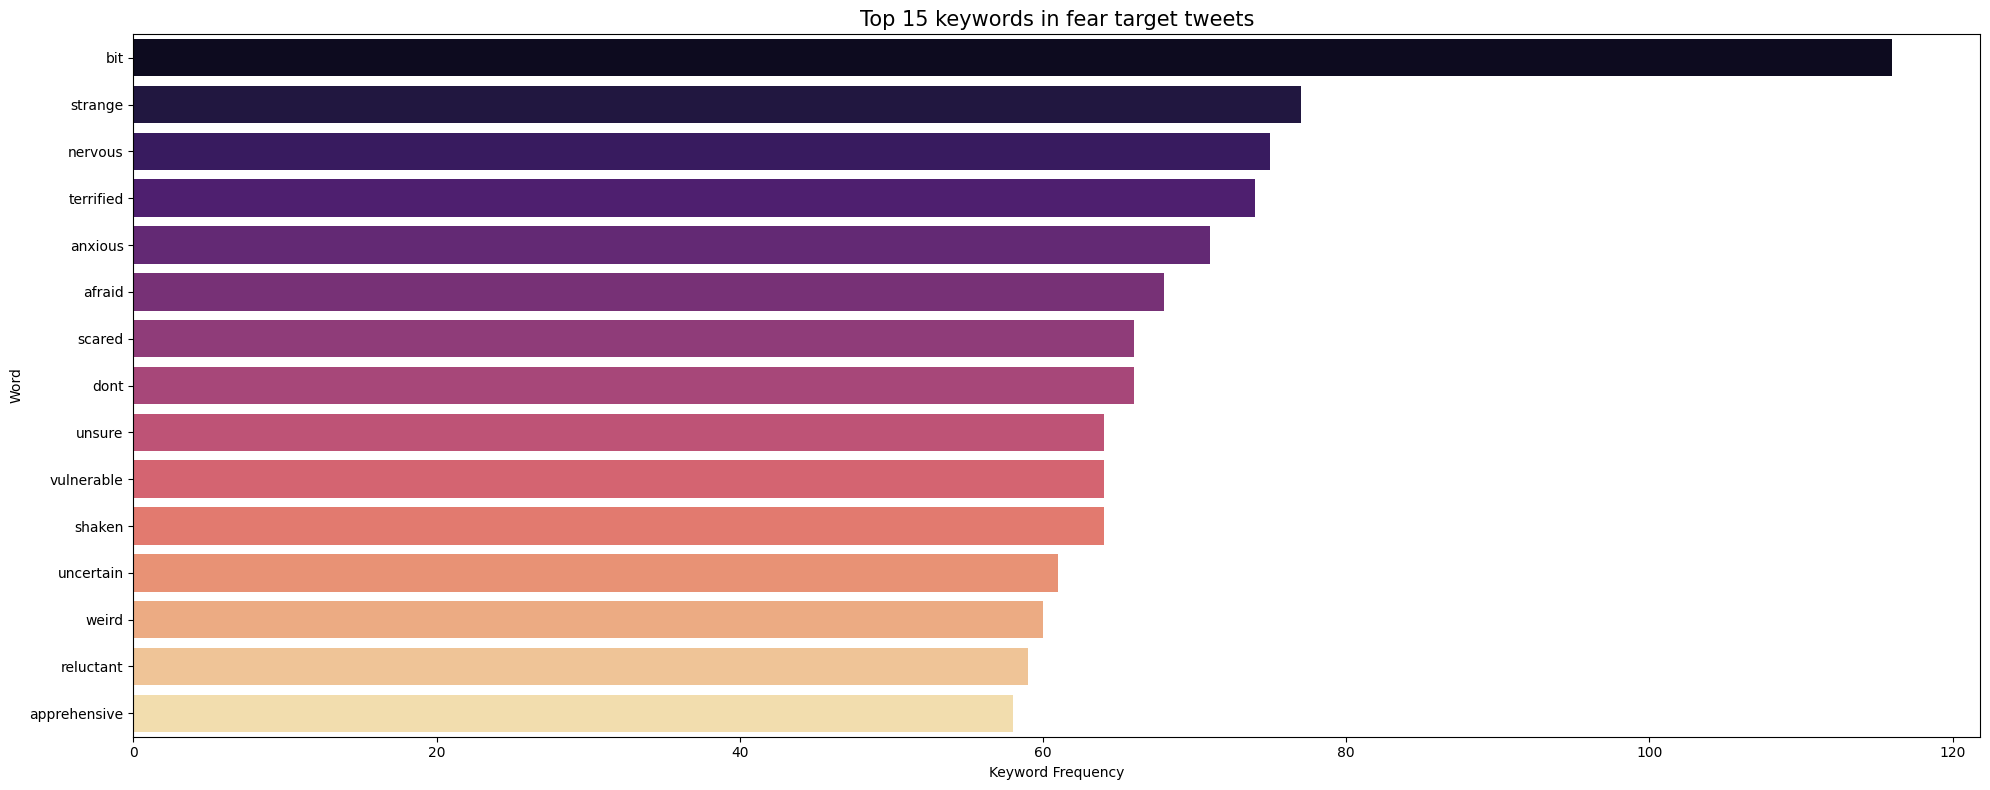

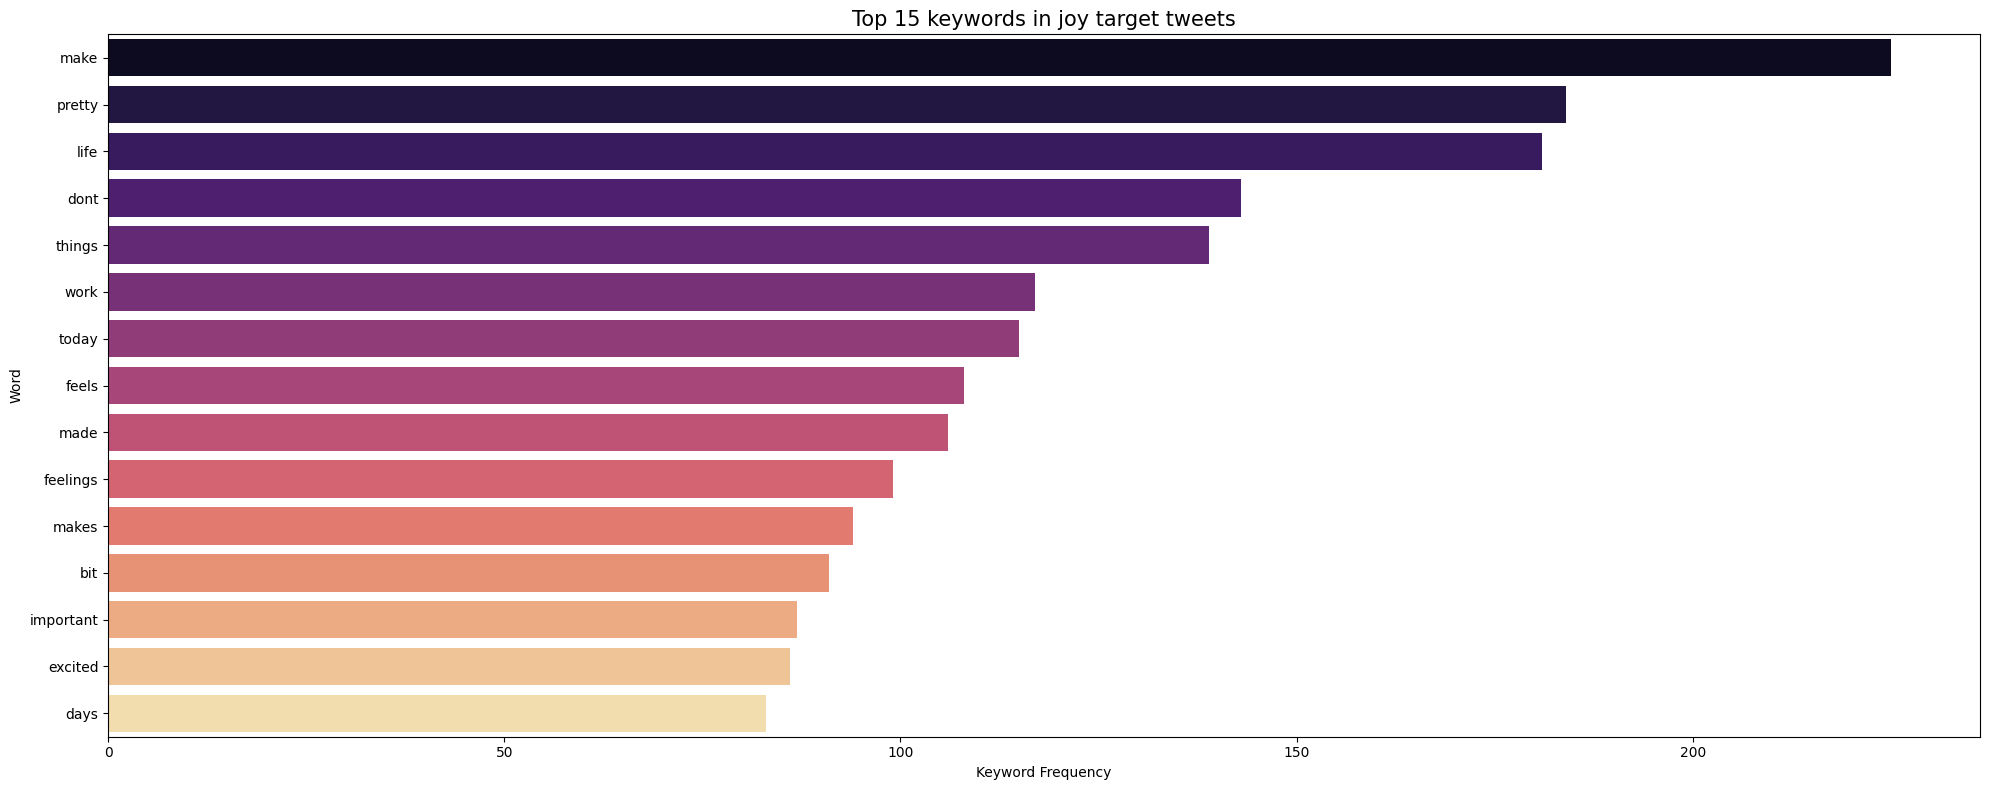

In [26]:
#noisy words
UNWANTED_WORDS = set([
    "i", "it", "ur", "na", "omg", "people", "time", "good", "back", "gon", "day", "love", "happy", "lt", "kst", 'im', 'feel', 'feeling', 'like', 'ive'
])

for l in train['label'].unique():

    text_series = [" ".join(text_list) for text_list in train[train.label == l]['text']]
    label_text = " ".join(text_series)

    words = nltk.tokenize.word_tokenize(label_text)
    
    filtered_words = [
        w for w in words if w.isalnum() and w not in STOPWORDS and w.lower() not in UNWANTED_WORDS          #  not in UNWANTED_WORDS
    ]
    
    label_keywords = nltk.FreqDist(filtered_words)
    
    label_keywords_df = pd.DataFrame(label_keywords.items(), columns=['Word', 'Frequency'])
    
    label_keywords_df = label_keywords_df.sort_values(by='Frequency', ascending=False).head(15)
    
    fig, ax = plt.subplots(figsize=(20, 8))
    sns.barplot(y=label_keywords_df['Word'], x=label_keywords_df['Frequency'], orient='h', ax=ax, palette="magma")

    ax.set_title(f'Top 15 keywords in {l} target tweets', fontsize=15)
    ax.set_xlabel('Keyword Frequency')

    plt.tight_layout()
    plt.show()

In [29]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)
valid.to_csv('valid.csv', index=False)

print('Done!')

Done!
